<a href="https://colab.research.google.com/github/abdulelahalshamrani2/bitcoin-price-prediction-lstm/blob/main/bitcoin_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


<function matplotlib.pyplot.show(close=None, block=None)>

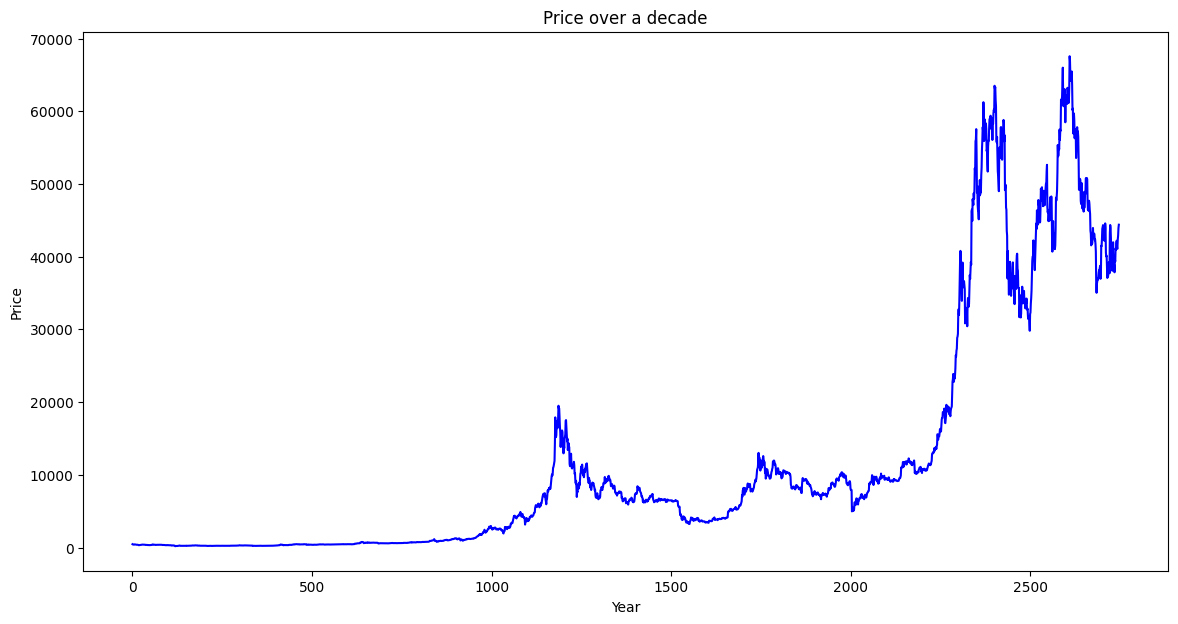

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Price over a decade")
plt.plot(data['Close'], color = 'b')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show

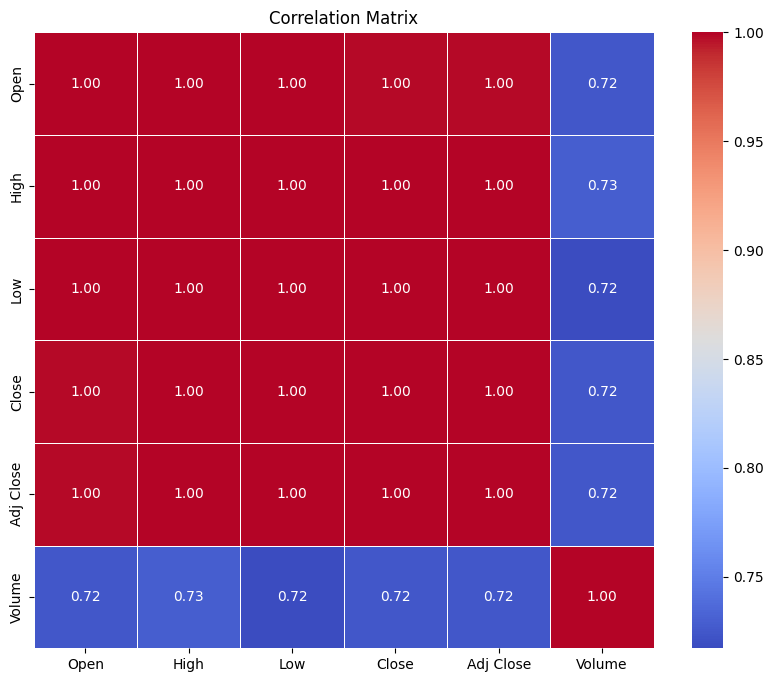

In [ ]:
numeric_data = data.drop(columns=['Date'])

# Correlation matrix to explore relationships between numeric variables
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

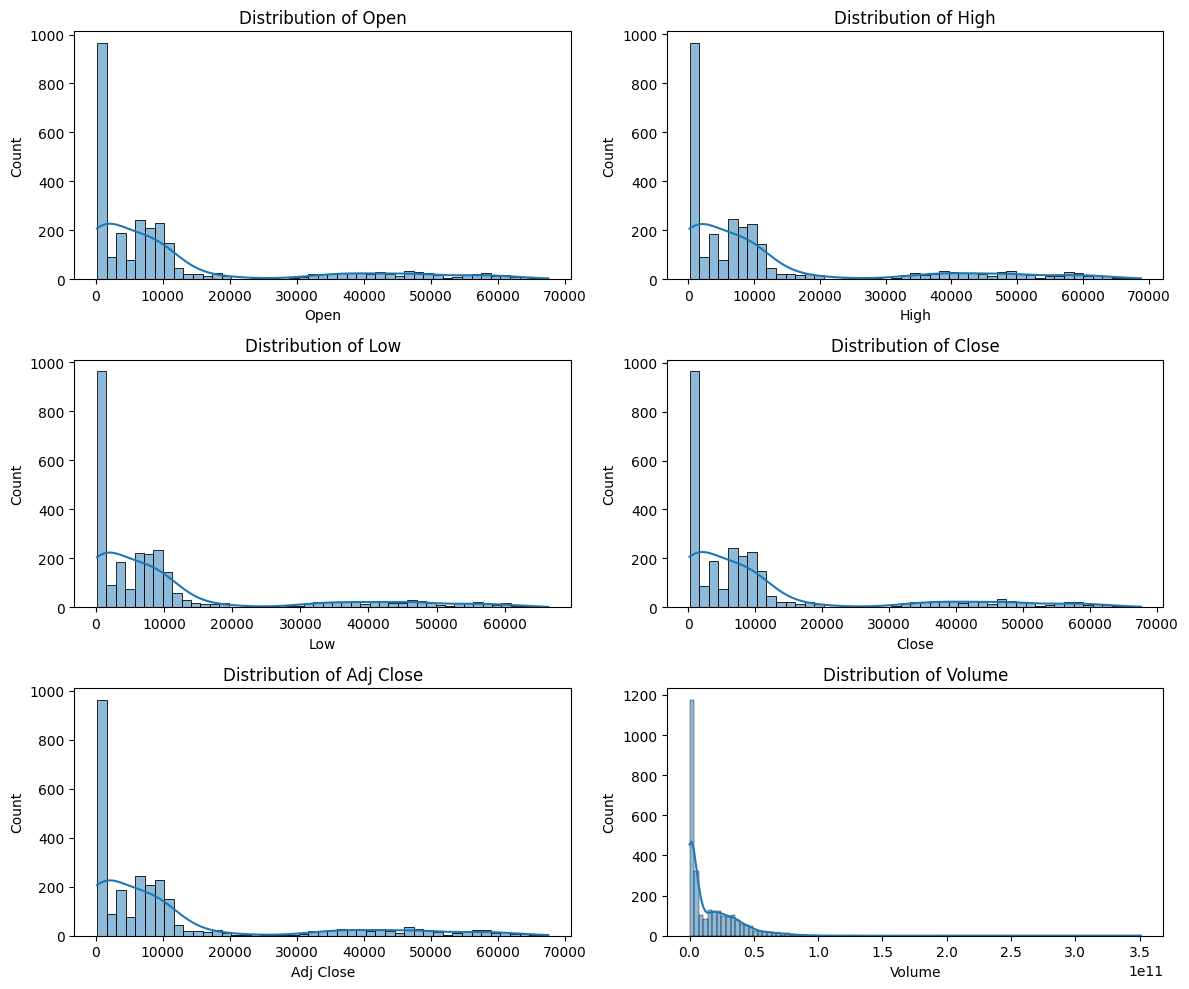

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[1:]):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

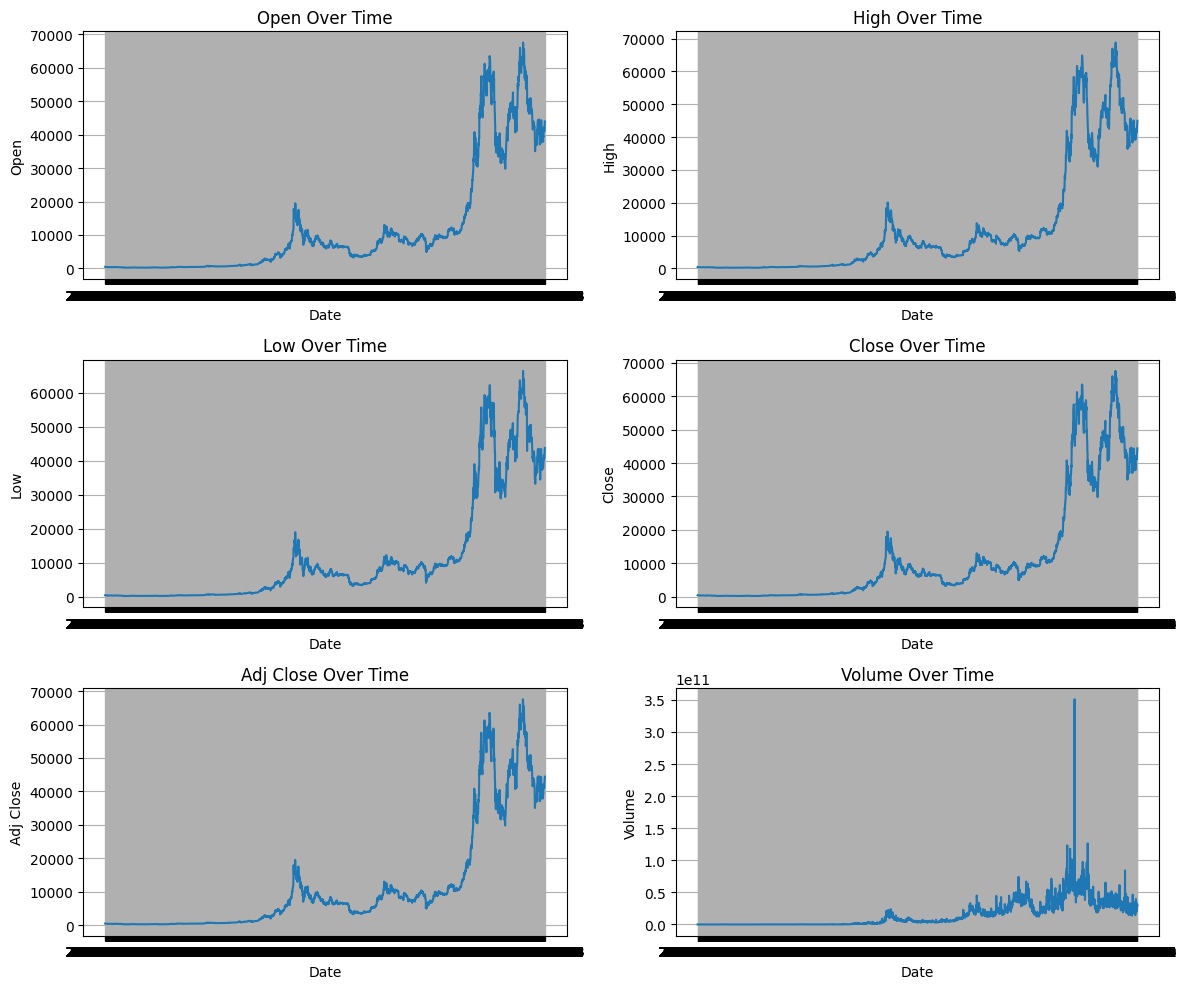

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[1:]):
    plt.subplot(3, 2, i+1)
    plt.plot(data['Date'], data[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} Over Time')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Date' column to datetime format if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Iterate over unique years and plot candlestick charts for each year
unique_years = data['Year'].unique()
for year in unique_years:
    # Filter data for the current year
    year_data = data[data['Year'] == year]

    # Create candlestick chart for the current year
    candlestick = go.Candlestick(x=year_data['Date'],
                                 open=year_data['Open'],
                                 high=year_data['High'],
                                 low=year_data['Low'],
                                 close=year_data['Close'],
                                 name='Candlestick')

    # Plot candlestick chart
    layout = go.Layout(title=f'Candlestick Chart of Price Movements for {year}',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Price'))

    fig = go.Figure(data=[candlestick], layout=layout)
    fig.show()

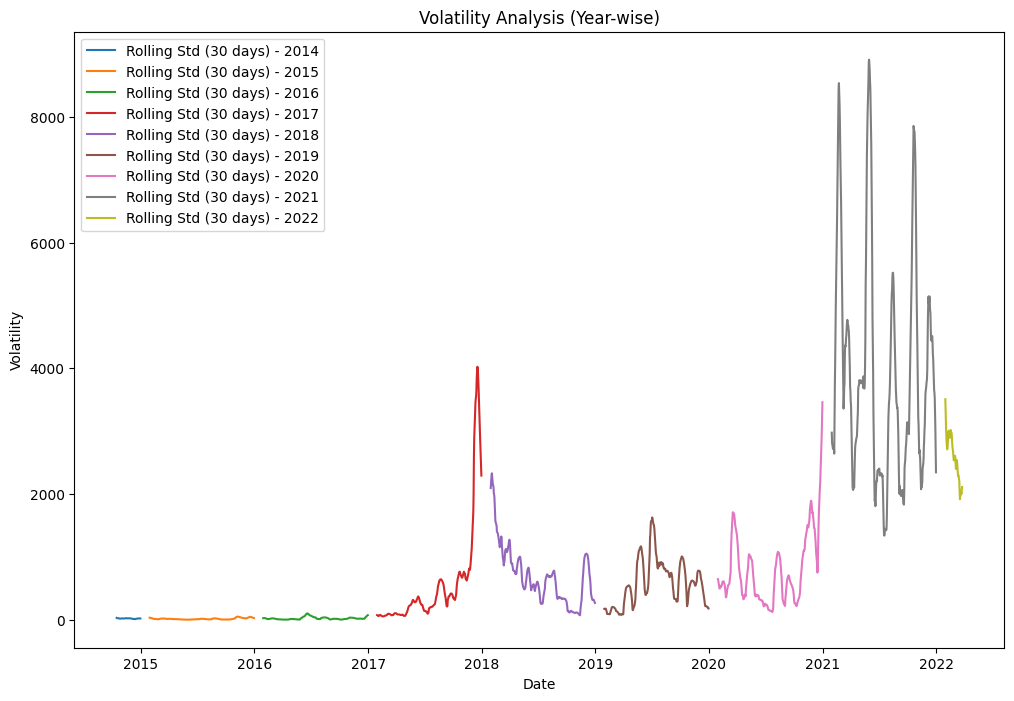

In [ ]:
grouped_data = data.groupby('Year')

# Volatility Analysis (Rolling Standard Deviation) year-wise
plt.figure(figsize=(12, 8))
for year, group in grouped_data:
    rolling_std = group['Close'].rolling(window=30).std()
    plt.plot(group['Date'], rolling_std, label=f'Rolling Std (30 days) - {year}')

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Analysis (Year-wise)')
plt.legend()
plt.show()

In [ ]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

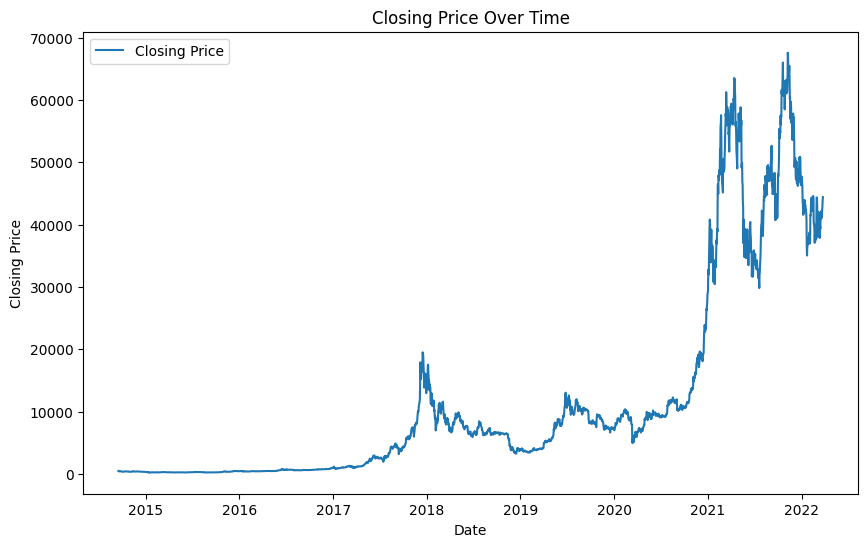

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

In [ ]:
data['Price Change'] = data['Close'] - data['Open']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price Change']])
sequence_length = 10

In [ ]:
sequences = []
next_day_price_change = []
for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    next_day_price_change.append(scaled_data[i+sequence_length][6])

In [ ]:
# Convert lists to arrays
X = np.array(sequences)
y = np.array(next_day_price_change)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#LSTM MODEL
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
#Train The Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0659 - val_loss: 0.0034
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

In [ ]:
#Evaluate Model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035
Test Loss: 0.002905805129557848


In [ ]:
#Predictions
predictions = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Split the data into features and target
X = scaled_data[:, :-1]  # Features (all columns except the last one)
y = scaled_data[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015 - val_loss: 9.6331e-04
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 9.3742e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 9.5148e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 8.9735e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 8.9077e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7524e-04 - val_loss: 0.0010
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 9.3626e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 8.8583e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 9.3284e-04
Epoch 12/100
55/55 ━━━━━━━━

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


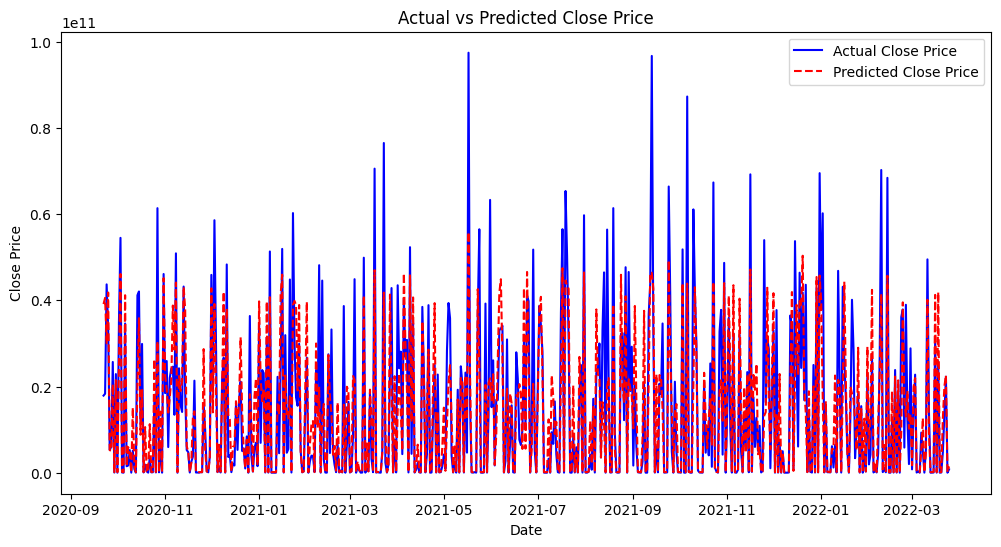

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
predictions = scaler.inverse_transform(np.concatenate((X_test, predictions), axis=1))[:, -1]
actual_values = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(predictions):], actual_values, label='Actual Close Price', color='blue')
plt.plot(data['Date'][-len(predictions):], predictions, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.030222310587541632


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

R-Squared: 0.6787715383014301


In [ ]:
from sklearn.metrics import accuracy_score

# True labels
y_true = [0, 1, 1, 0, 1]

# Predicted labels
y_pred = [0, 1, 0, 0, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.00%
